# MNIST Digit Recognition

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load and preview data

Training input dataset shape: (60000, 28, 28)
Training output dataset shape: (60000,)


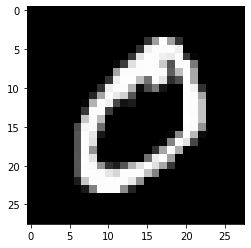

In [1]:
from tensorflow.keras.datasets import mnist

# Loading in data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training input dataset shape:", X_train.shape)
print("Training output dataset shape:", y_train.shape)
plt.imshow(X_train[1], cmap="gray")


### Normalize input images and encode output data

In [2]:
# Turning data into preferred data format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize Images
X_train /= 255.0
X_test /= 255.0

# Wrap each pixel into a dimension (keras assumes images have multiple channels, even though we only have one)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One hot encode output data
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
print(y_train.head())

   0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  1  0  0  0  0
1  1  0  0  0  0  0  0  0  0  0
2  0  0  0  0  1  0  0  0  0  0
3  0  1  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  0  1


### Building the model

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1), padding="same"))
model.add(Conv2D(16, (5, 5), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

from tensorflow.keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer="Adam", metrics=["accuracy"])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-12 13:50:07.870583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-12 13:50:07.870719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        6416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                    

### Training!!!

In [4]:
model_stats = model.fit(
    X_train,
    y_train,
    batch_size=196,
    epochs=12,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/12


2022-06-12 13:50:08.449698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-12 13:50:08.630465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


307/307 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.9066

2022-06-12 13:50:16.396103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


307/307 [==============================] - 9s 23ms/step - loss: 0.2973 - accuracy: 0.9066 - val_loss: 0.0659 - val_accuracy: 0.9784
Epoch 2/12
307/307 [==============================] - 7s 21ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 3/12
307/307 [==============================] - 6s 21ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 4/12
307/307 [==============================] - 6s 21ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 5/12
307/307 [==============================] - 6s 21ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0261 - val_accuracy: 0.9920
Epoch 6/12
307/307 [==============================] - 6s 21ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0214 - val_accuracy: 0.9928
Epoch 7/12
307/307 [==============================] - 7s 21ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 8/12

### Training Results

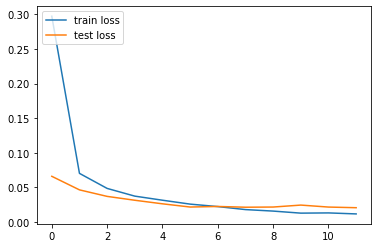

In [5]:
plt.plot(model_stats.history['loss'])
plt.plot(model_stats.history['val_loss'])
plt.legend(["train loss", "test loss"], loc="upper left")

### Trying your own images!

Raw output: [[5.4385630e-23 5.5060689e-20 2.7210685e-22 6.7517758e-13 6.3728198e-23
  1.0000000e+00 1.7767536e-16 1.4072932e-19 6.6001940e-16 1.9336711e-13]]
Predicted number: 5


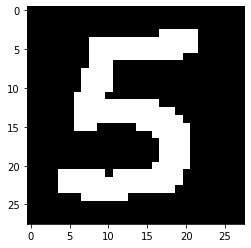

In [8]:
from PIL import Image

# Opening our own image and applying the same preprocessing steps
img = Image.open("/Users/eric/Downloads/test_image.png")
img = np.asarray(img.convert('L'))
img = img.astype('float32')
img /= 255.0
img = img.reshape(1, 28, 28, 1)

pred = model.predict(img)
print("Raw output:", pred)
print("Predicted number:", pred[0].argmax())
plt.imshow(img[0], cmap="gray")